# KMeans Cluster

In [128]:
#Dataset imoprt 
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sb

In [129]:
mail_customers = pd.read_csv('mall customers.csv') # load dataset

In [130]:
mail_customers.head() # show head 5 rows 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [131]:
mail_customers.drop('CustomerID',axis=1,inplace=True) # drop 1 columns

In [132]:
# rename all columns 
mail_customers.rename(columns={'Gender':'gender','Age':'age','Annual Income (k$)':'income',
                                'Spending Score (1-100)':'score'},inplace=True)

In [133]:
mail_customers.corr() # show dataset corr value 

,age,income,score
age,1.000000,-0.012398,-0.327227
income,-0.012398,1.000000,0.009903
score,-0.327227,0.009903,1.000000


<AxesSubplot:>

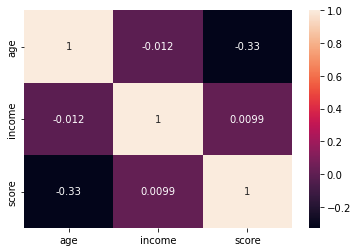

In [134]:
sb.heatmap(mail_customers.corr(),annot=True) # show heatmap dataset corr

# Visualization

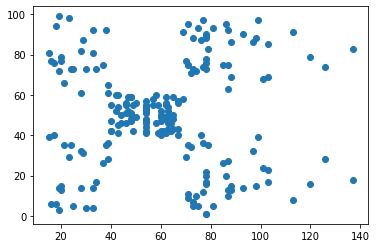

In [135]:
mp.scatter(mail_customers['income'],mail_customers['score']) # show scatter plot

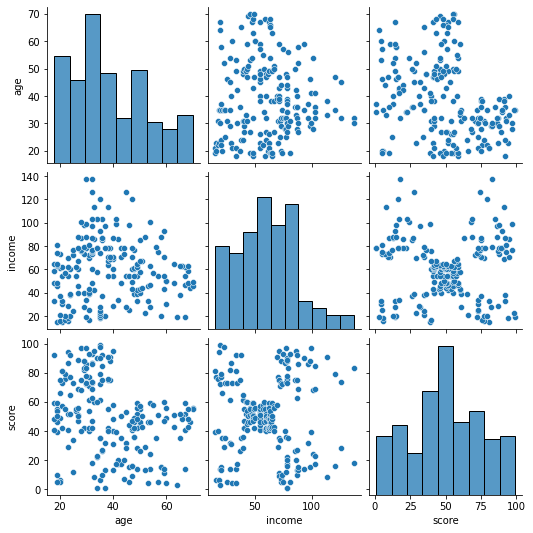

In [136]:
sb.pairplot(mail_customers[['age','income','score']]) # show dataset pairplot

In [137]:
#imoprt ml algorithm
import sklearn.cluster as cluster

In [138]:
kmeans=cluster.KMeans() # crate object

In [139]:
mail_customers['cluster']=kmeans.fit_predict(mail_customers[['income','score']]) # fit cluster

In [140]:
kmeans.cluster_centers_ 

array([[109.7       ,  22.        ],
       [ 47.72340426,  50.82978723],
       [ 78.03571429,  81.89285714],
       [ 25.0952381 ,  80.04761905],
       [ 25.14285714,  19.52380952],
       [ 80.18181818,  12.68181818],
       [108.18181818,  82.72727273],
       [ 64.45      ,  46.45      ]])

In [141]:
mail_customers.head()

,gender,age,income,score,cluster
0,Male,19,15,39,4
1,Male,21,15,81,3
2,Female,20,16,6,4
3,Female,23,16,77,3
4,Female,31,17,40,4


In [142]:
mail_customers0=mail_customers[mail_customers.cluster==0]
mail_customers1=mail_customers[mail_customers.cluster==1]
mail_customers2=mail_customers[mail_customers.cluster==2]
mail_customers3=mail_customers[mail_customers.cluster==3]
mail_customers4=mail_customers[mail_customers.cluster==4]
mail_customers5=mail_customers[mail_customers.cluster==5]
mail_customers6=mail_customers[mail_customers.cluster==6]
mail_customers7=mail_customers[mail_customers.cluster==7]

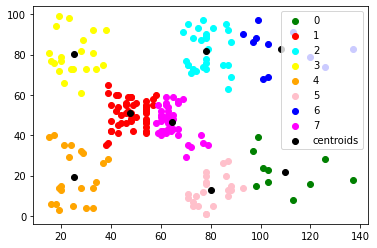

In [143]:
cluster=kmeans.cluster_centers_
mp.scatter(mail_customers0['income'], mail_customers0['score'], color='green', label='0')
mp.scatter(mail_customers1['income'], mail_customers1['score'], color='red', label='1')
mp.scatter(mail_customers2['income'], mail_customers2['score'], color='cyan', label='2')
mp.scatter(mail_customers3['income'], mail_customers3['score'], color='yellow', label='3')
mp.scatter(mail_customers4['income'], mail_customers4['score'], color='orange', label='4')
mp.scatter(mail_customers5['income'], mail_customers5['score'], color='pink', label='5')
mp.scatter(mail_customers6['income'], mail_customers6['score'], color='blue', label='6')
mp.scatter(mail_customers7['income'], mail_customers7['score'], color='magenta', label='7')
mp.scatter(cluster[:,0],cluster[:,1],color='black',label='centroids')
mp.legend()

# Select Optimal Number Of Clusters

In [144]:
import warnings as wr
wr.filterwarnings('ignore')

from sklearn.cluster import KMeans

wcss=[]

a = range(1,15)

for i in a:
    b=KMeans(n_clusters=i)
    b.fit(mail_customers[['income','score']])
    wcss.append(b.inertia_)



In [145]:
wcss

[269981.28000000014,
 183069.17582751295,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37265.86520484345,
 30273.394312070028,
 24995.96978113596,
 21826.936303231643,
 19646.482018947245,
 17546.928000046544,
 16026.308016983028,
 14321.881821120063,
 13067.866802805034]

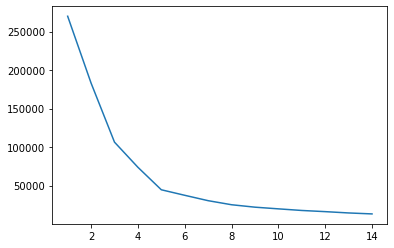

In [146]:
mp.plot(a,wcss)

In [147]:
!pip install kneed

In [148]:
from kneed import KneeLocator 

In [149]:
kl=KneeLocator(a,wcss,curve='convex',direction='decreasing')

In [150]:
kl.knee

5